# Assignment submission:
## Machine Leaning 1-6: Assignment 1
### Student: Ginju Soumya

 -----------------------------------------------------------------------------------------------------------------

# 2.1. Problem Statement: Machine Learning 1 <br>

# 1. What are the three stages to build the hypotheses or model in machine learning?

1. Model building <br>
2. Model testing <br>
3. Applying the model <br>

# 2. What is the standard approach to supervised learning?

The standard approach to supervised learning is to split the dataset into training dataset and test dataset.

# 3. What is Training set and Test set?

The set of data used to discover the potentially predictive relationship and to train the model is known as 'Training Set' .
Training set is a set of examples given to the learner.

Test dataset is the set of data used to test the accuracy of the hypotheses generated by the learner and it is the set of data held back from the learner to test it.
Training set is distinct from Test set.

# 4. What is the general principle of an ensemble method and what is bagging and boosting in ensemble method?

The general principle of an ensemble method is to combine the predictions of several models built with a given learning algorithm in order to improve robustness over a single model.

Bagging (Bootstrap eggregating) is a method in ensemble for improving unstable estimation or classification schemes.
Boosting method are used sequentially to reduce the bias of the combined model.
Boosting and Bagging both can reduce errors by reducing the variance term.

# 5. How can you avoid overfitting ?

1. Cross-validation: Cross-validation is a powerful preventative measure against overfitting.
Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.
Cross-validation allows you to tune hyperparameters with only your original training set. This allows you to keep your test set as a truly unseen dataset for selecting your final model.

2. Train with more data: It won't work every time, but training with more data can help algorithms detect the signal better.
3. Remove features: you can manually improve their generalizability by removing irrelevant input features.
4. Early stopping: When you’re training a learning algorithm iteratively, you can measure how well each iteration of the model performs.
Up until a certain number of iterations, new iterations improve the model. After that point, however, the model’s ability to generalize can weaken as it begins to overfit the training data.
Early stopping refers stopping the training process before the learner passes that point.
5. Regularization: Regularization refers to a broad range of techniques for artificially forcing your model to be simpler.
The method will depend on the type of learner you’re using. For example, you could prune a decision tree, use dropout on a neural network, 
or add a penalty parameter to the cost function in regression.
The regularization method is a hyperparameter as well, which means it can be tuned through cross-validation.
6. Ensembling: Ensembles are machine learning methods for combining predictions from multiple separate models. There are a few different methods for ensembling, but the two most common are:

Bagging attempts to reduce the chance overfitting complex models.
It trains a large number of "strong" learners in parallel.
A strong learner is a model that's relatively unconstrained.
Bagging then combines all the strong learners together in order to "smooth out" their predictions.

Boosting attempts to improve the predictive flexibility of simple models.
It trains a large number of "weak" learners in sequence.
A weak learner is a constrained model (i.e. you could limit the max depth of each decision tree).
Each one in the sequence focuses on learning from the mistakes of the one before it.
Boosting then combines all the weak learners into a single strong learner.
While bagging and boosting are both ensemble methods, they approach the problem from opposite directions.

Bagging uses complex base models and tries to "smooth out" their predictions, while boosting uses simple base models and tries to "boost" their aggregate complexity.

# 2.2. Problem Statement: Machine Learning 2 <br>

# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. 
Here is the code to load the data:

In [189]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [5]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
bos.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
bos.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [9]:
bos.shape

(506, 13)

In [10]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [11]:
dir(bos)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
#Adding feature name to the dataset
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [17]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# Adding TARGET colum into the dataframe
bos["TGT"]=boston.target
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


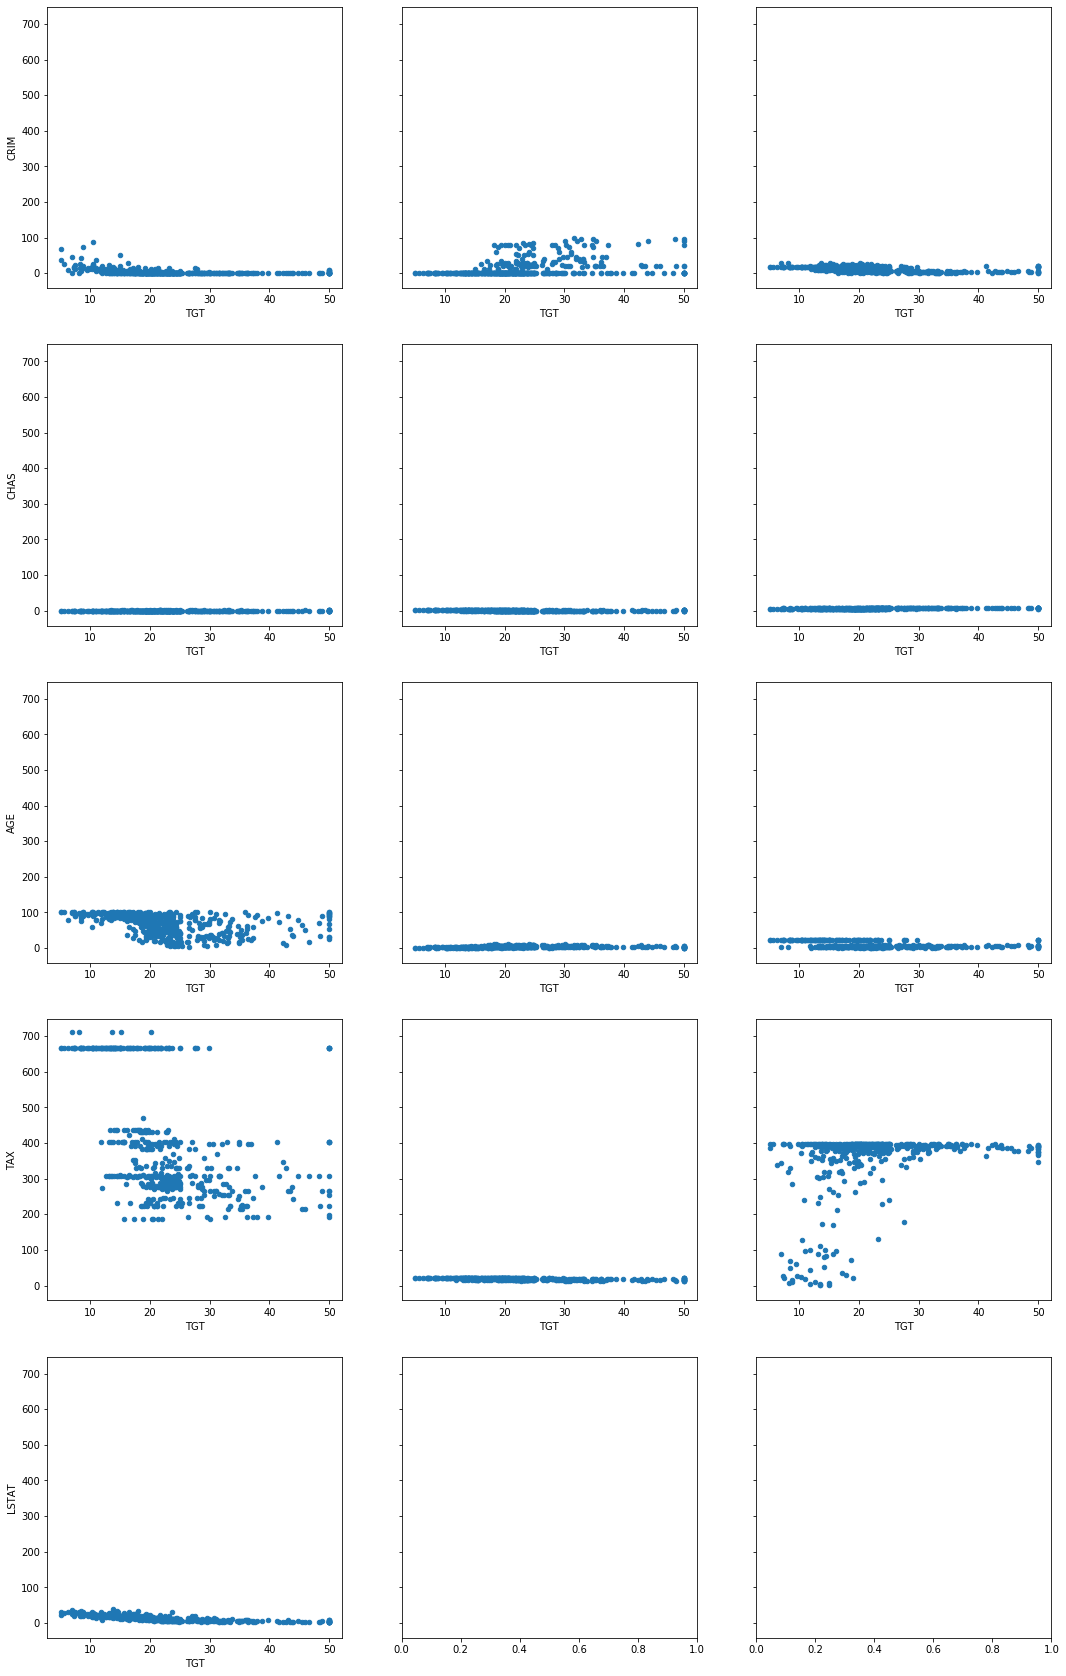

In [19]:
#Visualisation
fig, axs = plt.subplots(5,3,sharey=True)
bos.plot(kind='scatter', x='TGT', y='CRIM', ax=axs[0][0], figsize=(18, 30))
bos.plot(kind='scatter', x='TGT', y='ZN', ax=axs[0][1])
bos.plot(kind='scatter', x='TGT', y='INDUS', ax=axs[0][2])
bos.plot(kind='scatter', x='TGT', y='CHAS', ax=axs[1][0])
bos.plot(kind='scatter', x='TGT', y='NOX', ax=axs[1][1])
bos.plot(kind='scatter', x='TGT', y='RM', ax=axs[1][2])
bos.plot(kind='scatter', x='TGT', y='AGE', ax=axs[2][0])
bos.plot(kind='scatter', x='TGT', y='DIS', ax=axs[2][1])
bos.plot(kind='scatter', x='TGT', y='RAD', ax=axs[2][2])
bos.plot(kind='scatter', x='TGT', y='TAX', ax=axs[3][0])
bos.plot(kind='scatter', x='TGT', y='PTRATIO', ax=axs[3][1])
bos.plot(kind='scatter', x='TGT', y='B', ax=axs[3][2])
bos.plot(kind='scatter', x='TGT', y='LSTAT', ax=axs[4][0])

In [20]:
# to avoid 1-D & 2-D error, creating x & y
feature_columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x = bos[feature_columns]
y = bos.TGT

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
print (reg)
reg.fit(x, y)

print('intercept', reg.intercept_)
print('confficient', reg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept 36.45948838509015
confficient [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [22]:
print(reg.fit(x,y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [23]:
print(reg.score(x,y))

0.7406426641094095


In [24]:
print(reg.predict(x))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [25]:
import statsmodels.formula.api as smf
reg = smf.ols(formula='TGT ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=bos).fit()
reg.conf_int()

,0,1
Intercept,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [26]:
reg.pvalues

Intercept    3.283438e-12
CRIM         1.086810e-03
ZN           7.781097e-04
INDUS        7.382881e-01
CHAS         1.925030e-03
NOX          4.245644e-06
RM           1.979441e-18
AGE          9.582293e-01
DIS          6.013491e-13
RAD          5.070529e-06
TAX          1.111637e-03
PTRATIO      1.308835e-12
B            5.728592e-04
LSTAT        7.776912e-23
dtype: float64

In [27]:
reg.rsquared

0.7406426641094095

In [28]:
reg.conf_int()

,0,1
Intercept,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [29]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TGT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          6.72e-135
Time:                        14:27:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Split data- Train and Test

In [30]:
from sklearn.model_selection import train_test_split
# taking 33% of data as test and 67% as training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(339, 13) (339,)
(167, 13) (167,)


In [35]:
#training the model
reg1 = LinearRegression()
reg1.fit(x_train,y_train)
predTrain = reg1.predict(x_train)
predTest = reg1.predict(x_test)
predTest[0:5]

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ])

In [33]:
reg1.score(x_test,y_test)

0.7261570836552479

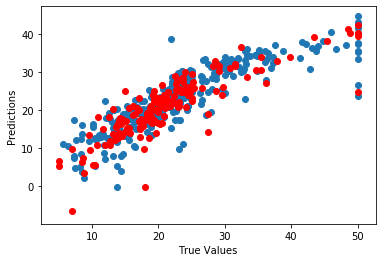

In [34]:
plt.scatter(y_train, predTrain)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.scatter(y_test, predTest, color='red')

# 2.3. Problem Statement: Machine Learning 3 <br>

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/
unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs

Code to loading data and modules:

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split 
from sklearn import metrics 
#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score 
dta =sm.datasets.fair.load_pandas().data

In [45]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [46]:
dta.isnull()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6361,False,False,False,False,False,False,False,False,False
6362,False,False,False,False,False,False,False,False,False
6363,False,False,False,False,False,False,False,False,False
6364,False,False,False,False,False,False,False,False,False


In [47]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [48]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [49]:
# 2. add "affair" column: 1 represents having affairs, 0 represents not 
#data to be converted into categorical
dta['affair'] = (dta.affairs >0).astype(int)

In [50]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [51]:
dta.drop('affairs',axis = 1,inplace = True)

In [52]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [53]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affair'],
      dtype='object')

In [54]:
dta.describe(include='all')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [55]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [56]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affair,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


In [57]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.181446


Text(0, 0.5, 'Frequency')

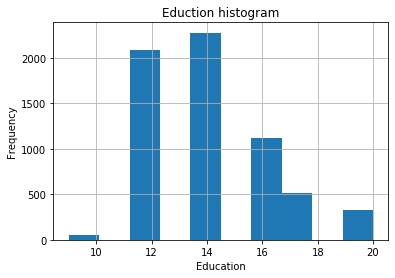

In [58]:
dta.educ.hist()
plt.title('Eduction histogram')
plt.xlabel('Education')
plt.ylabel('Frequency')

In [59]:
dta["educ"].value_counts()

14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64

Text(0, 0.5, 'Frequency')

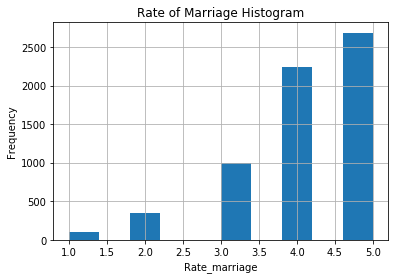

In [60]:
dta.rate_marriage.hist()
plt.title('Rate of Marriage Histogram')
plt.xlabel('Rate_marriage')
plt.ylabel('Frequency')

In [61]:
dta["rate_marriage"].value_counts()

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64

Text(0, 0.5, 'Frequency')

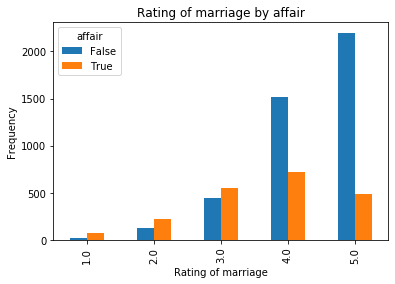

In [62]:
# Bar plot for rating of marriage which is grouped by affair

pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Rating of marriage by affair')
plt.xlabel('Rating of marriage')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

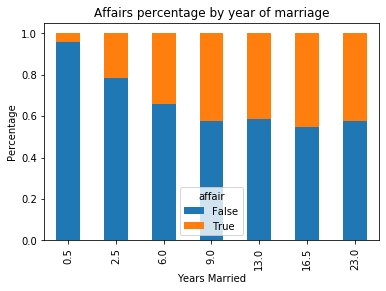

In [63]:
# Barstacked bar Plots for number of years of marriage to affairs
yearsaffair = pd.crosstab(dta.yrs_married,dta.affair.astype(bool))
yearsaffair.div(yearsaffair.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affairs percentage by year of marriage')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

Text(0.5, 1, 'dta.corr()')

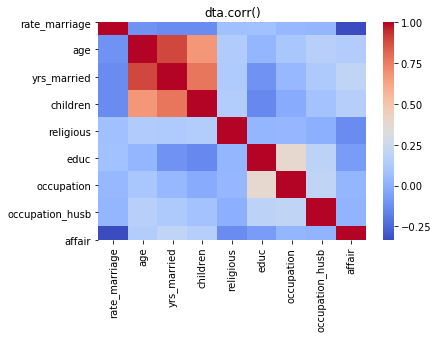

In [64]:
## Find Correlation by plot
import seaborn as sns
sns.heatmap(dta.corr(),cmap='coolwarm')
plt.title('dta.corr()')

The observation from the heat map is that there is a corelation between years of marriage, age, no of children

In [65]:
dta.groupby('affair').describe()

rate_marriage                                                  age  \
               count      mean       std  min  25%  50%  75%  max   count   
affair                                                                      
0             4313.0  4.329701  0.821099  1.0  4.0  5.0  5.0  5.0  4313.0   
1             2053.0  3.647345  1.065286  1.0  3.0  4.0  4.0  5.0  2053.0   

                   ... occupation      occupation_husb                      \
             mean  ...        75%  max           count      mean       std   
affair             ...                                                       
0       28.390679  ...        4.0  6.0          4313.0  3.833758  1.361392   
1       30.537019  ...        4.0  6.0          2053.0  3.884559  1.314123   

                                 
        min  25%  50%  75%  max  
affair                           
0       1.0  3.0  4.0  5.0  6.0  
1       1.0  3.0  4.0  5.0  6.0  

[2 rows x 64 columns]

In [66]:
#Applying Logistic regression 
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +\
                  C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


y = np.ravel(y)

In [67]:
#Logistic Regression Model 
model = LogisticRegression()
model = model.fit(X,y)

model.score(X,y)#checking data

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [68]:
y.mean()

0.3224945020420987

ie. 32% of the women has affair which inturn proves 68% is not on affair. The above score 72.5% from the model holds good.

In [69]:
# co-efficients
X.columns,np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48983589],
        [ 0.18806639],
        [ 0.49894787],
        [ 0.25066856],
        [ 0.83900806],
        [ 0.83390843],
        [ 0.19063594],
        [ 0.29783271],
        [ 0.16140885],
        [ 0.18777091],
        [ 0.19401637],
        [-0.70312336],
        [-0.05841777],
        [ 0.10567654],
        [ 0.01691927],
        [-0.37113627],
        [ 0.0040165 ]]))

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
#Train and Test the model
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = .3,random_state=42)
model2 = LogisticRegression()
model2.fit(x_train, y_train)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
predictions = model2.predict(x_val)
predictions

array([0., 0., 0., ..., 0., 0., 1.])

In [74]:
probabilities = model.predict_proba(x_val)
probabilities

array([[0.68918981, 0.31081019],
       [0.4901929 , 0.5098071 ],
       [0.70062567, 0.29937433],
       ...,
       [0.68539118, 0.31460882],
       [0.83525857, 0.16474143],
       [0.50135674, 0.49864326]])

In [75]:
#printing confusion matrix
print(metrics.classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81      1275
         1.0       0.65      0.38      0.48       635

    accuracy                           0.73      1910
   macro avg       0.70      0.64      0.65      1910
weighted avg       0.71      0.73      0.70      1910



In [76]:
#priniting evaluation metrics
print(metrics.accuracy_score(y_val, predictions))
print(metrics.roc_auc_score(y_val, prob[:,1]))

0.725130890052356
0.7624906592558284



73% accuracy is observed while training and with predicting on the same data. Alsothe confusion matrix and a classification report gives value >70%.

In [79]:
#Testing 

X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [80]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0,1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.77472221, 0.22527779]])

23% of probability of an affair is precdicted

# 2.4. Problem Statement: Machine Learning 4 <br>

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url=
https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
Science/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns =
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','
Ticket','Fare','Cabin','E mbarked']
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [126]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [127]:
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
titanicdata = titanic.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
titanicdata.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [129]:
titanicdata.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [130]:
titanicdata.size

6237

In [131]:
titanicdata.fillna(0, inplace=True)
titanicdata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [132]:
le = preprocessing.LabelEncoder()

In [135]:
titanicdata['Sex'] = le.fit_transform(titanicdata['Sex'])
titanicdata.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250


In [136]:
from IPython.display import Image, display

In [137]:
y = titanicdata['Survived']
X = titanicdata[['Pclass','Sex','Age','SibSp','Parch','Fare']] 

In [138]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [139]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [140]:
y_prediction = dtree.predict(X_test)

In [143]:
count_misclassified = (y_test != y_prediction).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 51
Accuracy: 0.81


In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.81111111 0.81111111 0.78651685 0.83146067 0.82022472 0.78651685
 0.79775281 0.78651685 0.83146067 0.79545455]
Average accuracy:  0.8058126205879015


# 2.5. Problem Statement: Machine Learning 5<br>

In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.
Following the code to get data into the environment:


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [105]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [106]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [107]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [108]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [109]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [110]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [112]:
X.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [113]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [121]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.3, random_state=0)

clf = DecisionTreeRegressor(random_state=1, min_samples_leaf=2)
clf.fit(X_train, Y_train)

clf2 = DecisionTreeRegressor(random_state=1, max_depth=5)
clf2.fit(X_train, Y_train)

print(clf.score(X_test, Y_test))
print(clf2.score(X_test, Y_test))

0.6642626437828847
0.6730422237584595


In [116]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

rfc1 = RandomForestRegressor(random_state=1) #max_features=10, RandomForestClassifier
rfc1.fit(X_train,Y_train)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [117]:
rfc2 = RandomForestRegressor(max_features=8, random_state=10)
rfc2.fit(X_train, Y_train)
pred1 = rfc1.predict(X_test)
pred2 = rfc2.predict(X_test)

C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [118]:
print('Variance score: %f' % r2_score(Y_test, pred1))
print('Variance score: %f' % r2_score(Y_test, pred2))

Variance score: 0.773453
Variance score: 0.818265


In [119]:
print(rfc1.feature_importances_)

[3.26867257e-02 6.65358067e-04 1.08323324e-02 5.65623459e-04
 1.52650820e-02 1.97018441e-01 3.50154421e-02 3.66330549e-02
 9.98452209e-03 1.52778278e-02 1.23188352e-02 8.46124420e-03
 6.25275511e-01]


In [120]:
print(rfc2.feature_importances_)

[0.01197948 0.00354338 0.06789503 0.00274578 0.02034913 0.4152825
 0.02044647 0.09308789 0.00968417 0.02524316 0.01725675 0.00776426
 0.304722  ]


# 2.6. Problem Statement: Machine Learning 6<br>

In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))
Attribute Information:
Listing of attributes: >50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Execmanagerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct,
Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,
Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Following is the code to load required libraries and data:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-
databases/adult/adult.dat a', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machinelearning-
databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education',
'education_num', 'marital_status', 'occupation','relationship', 'race',
'sex', capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [191]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tmsgsks\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    ca-certificates-2019.8.28  |                0         165 KB  anaconda
    certifi-2019.9.11          |           py37_0         155 KB  anaconda
    conda-4.7.12               |           py37_0         3.0 MB  anaconda
    libxgboost-0.90            |                1         3.9 MB  anaconda
    openssl-1.1.1d             |       he774522_2         5.7 MB  anaconda
    py-xgboost-0.90            |           py37_1          80 KB  anaconda
    ------------------------------------------------------------
                                           Total:        13.0 MB

The following NEW p

In [192]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
from xgboost import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
train_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
test_set = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 'occupation','relationship', 'race','sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']

In [195]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [196]:
train_set.columns = col_labels
test_set.columns = col_labels

In [197]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [198]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [199]:
train_set.shape, test_set.shape

((32561, 15), (16281, 15))

In [200]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [201]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [202]:
print(train_set.duplicated().any())
print(train_set.duplicated().sum())

True
24


In [203]:
train_set.drop_duplicates(keep='first', inplace=True)
train_set.shape

(32537, 15)

In [204]:
print(test_set.duplicated().any())
print(test_set.duplicated().sum())

True
5


In [205]:
test_set.drop_duplicates(keep='first', inplace=True)
test_set.shape

(16276, 15)

In [206]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [207]:
train_new = train_set.replace(' ?', np.nan).dropna()
print(train_new.shape)
test_new = test_set.replace(' ?', np.nan).dropna()
print(test_new.shape)

(30139, 15)
(15055, 15)


In [208]:
train_new.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [209]:
test_new.wage_class.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [210]:
test_new['wage_class'] = test_new.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
le= LabelEncoder()
for i in train_new.columns:
    if train_new[i].dtype == 'object':
        train_new[i] = le.fit_transform(train_new[i])

In [213]:
train_new.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0


In [214]:
for i in test_new.columns:
    if test_new[i].dtype == 'object':
        test_new[i] = le.fit_transform(test_new[i])
test_new.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1


In [215]:
combdata = pd.concat([train_new,test_new],axis=0)

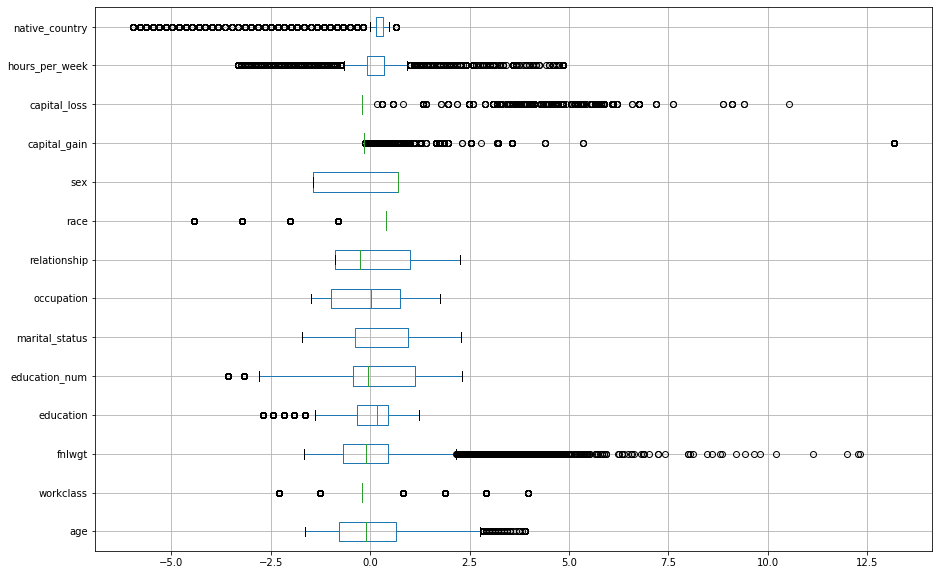

In [216]:
from sklearn.preprocessing import StandardScaler
x=combdata.drop(['wage_class'],axis=1)
scaler=StandardScaler().fit(x)

y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

In [217]:
combdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45194.0,38.551755,13.215806,17.0,28.00,37.0,47.0,90.0
workclass,45194.0,2.204563,0.958362,0.0,2.00,2.0,2.0,6.0
fnlwgt,45194.0,189737.853056,105640.654414,13492.0,117392.25,178312.0,237903.0,1490400.0
education,45194.0,10.313161,3.816837,0.0,9.00,11.0,12.0,15.0
education_num,45194.0,10.119109,2.552057,1.0,9.00,10.0,13.0,16.0
marital_status,45194.0,2.584879,1.500492,0.0,2.00,2.0,4.0,6.0
occupation,45194.0,5.970062,4.026796,0.0,2.00,6.0,9.0,13.0
relationship,45194.0,1.412820,1.597474,0.0,0.00,1.0,3.0,5.0
race,45194.0,3.680201,0.832442,0.0,4.00,4.0,4.0,4.0
sex,45194.0,0.675067,0.468355,0.0,0.00,1.0,1.0,1.0


XG BOOST Model

In [218]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [219]:
X_train=train_new.drop(['wage_class'],axis=1)
Y_train=train_new[['wage_class']]
X_test=test_new.drop(['wage_class'],axis=1)
Y_test=test_new[['wage_class']]

In [220]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [221]:
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',XGBClassifier()))
models

[('Logistic',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('GB', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
            

In [222]:
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])

for name, model in models:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,Logistic,0.787419,0.004923
1,CART,0.804805,0.005788
2,GB,0.859783,0.005644


In [223]:
predictors = X_train.columns
predictors

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [224]:
def modelfit(alg, train_new, predictors,useTrainCV=True, cv_folds=5):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(train_new[predictors].values, label=Y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc')
        print(cvresult)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train_new[predictors], Y_train.values,eval_metric='auc')
        
    #Predict training set:
    train_new_predictions = alg.predict(train_new[predictors])
    train_new_predprob = alg.predict_proba(train_new[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(Y_train.values, train_new_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(Y_train.values, train_new_predprob))
                    

In [226]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=2000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 seed=27)
modelfit(xgb1, X_train, predictors)

      train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.882851       0.002184       0.881253      0.003292
1           0.891828       0.004579       0.889750      0.004263
2           0.895690       0.003448       0.893261      0.004189
3           0.899684       0.002773       0.897247      0.004408
4           0.900987       0.002487       0.898294      0.005216
...              ...            ...            ...           ...
1995        0.996594       0.000183       0.912472      0.002572
1996        0.996602       0.000183       0.912474      0.002574
1997        0.996611       0.000186       0.912461      0.002564
1998        0.996617       0.000188       0.912447      0.002560
1999        0.996623       0.000182       0.912459      0.002561

[2000 rows x 4 columns]

Model Report
Accuracy : 0.9641
AUC Score (Train): 0.994056


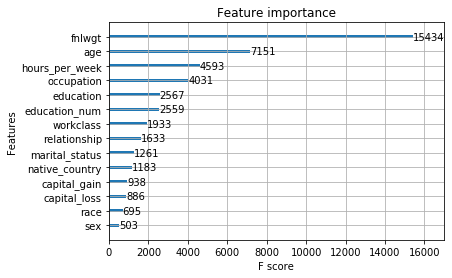

In [227]:
xgb.plot_importance(xgb1)

# This assignment consists of 1200 marks and and needs to be submitted in GitHub. You can follow GitHub submission guide provided to do the same.

# THE END